<a href="https://colab.research.google.com/github/Joseph-Maulin/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Joseph_Maulin_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [5]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
sales_mean = sum(sales)/len(sales)
sales_variance = sum(list(map(lambda x: (x-sales_mean)**2, sales)))/len(sales)
sales_std = sales_variance ** 0.5

print(sales_mean)
print(sales_variance)
print(sales_std)

3052.714285714286
183761.06122448976
428.67360686714756


In [9]:
# check with functions
import numpy as np

print(np.mean(sales))
print(np.var(sales))
print(np.std(sales))

3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

In [32]:
import pandas as pd
df = pd.DataFrame({"sales":sales, "customers":customers})
df

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [34]:
sales_std = df['sales'].std(ddof=1)
sales_std

463.0204150595357

In [36]:
customers_std = df['customers'].std(ddof=1)
customers_std

17.057326313123664

In [37]:
cov_sc = df['sales'].cov(df['customers'])
cov_sc

7604.357142857142

In [22]:
cov_sc = np.cov(customers, sales)
cov_sc

array([[   290.95238095,   7604.35714286],
       [  7604.35714286, 214387.9047619 ]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [38]:
customers_std = df['customers'].std(ddof=1)
customers_std

17.057326313123664

In [39]:
corr_sc = cov_sc / (sales_std * customers_std)
corr_sc

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [69]:
titanic_df.drop(['Unnamed: 0'], axis=1, inplace=True)
titantic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
titanic_df['sex'] = titanic_df['sex'].map({'female':1, 'male':0})

In [73]:
titanic_df.cov()

,pclass,survived,sex,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-0.050011,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,0.123090,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
sex,-0.050011,0.123090,0.229438,-0.354202,0.054690,0.088362,4.600321,0.387672,0.027508
age,-3.954605,-0.314343,-0.354202,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,0.054690,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,0.088362,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,4.600321,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,0.387672,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,0.027508,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [72]:
titatic_df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
v1 = np.array([1,2])
v2 = np.array([-2,1])

In [78]:
np.dot(v1,v2)

0

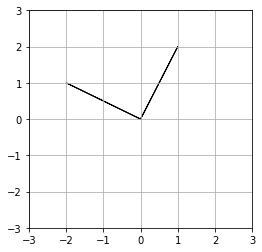

In [77]:
import matplotlib.pyplot as plt
# Plot the vectors

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

plt.arrow(0,0,*v1)
plt.arrow(0,0,*v2);

In [0]:
# synonym would be perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])

In [80]:
np.dot(a,b)

-40

In [0]:
# these are not orthogonal because the dot product != 0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2,-15,6,20])

In [84]:
np.linalg.norm(c) ** 2

665.0

In [85]:
np.dot(c, c)

665

In [88]:
np.dot(c.T, c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [93]:
i_hat = np.array([1,0])
j_hat = np.array([0,1])

d = np.multiply(i_hat, 7) + np.multiply(j_hat, 12)
print(d)

i_hat = np.array([1,0,0])
j_hat = np.array([0,1,0])
z_hat = np.array([0,0,1])
e = np.multiply(i_hat, 2) + np.multiply(j_hat, 11) + np.multiply(z_hat, -8)
print(e)

[ 7 12]
[ 2 11 -8]


In [90]:
d = np.array([7,12])
e = np.array([2,11,-8])

norm_d = np.linalg.norm(d)
norm_e = np.linalg.norm(e)

d_hat = d/norm_d
e_hat = e/norm_e

print(d_hat)
print(e_hat)

[0.50387103 0.8637789 ]
[ 0.14547859  0.80013226 -0.58191437]


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [94]:
f = np.array([4,12,11,9,2])
norm_f = np.linalg.norm(f)
f_hat = f/norm_f
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [95]:
np.linalg.norm(f_hat)

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
# linearly dependent
v1 = [1,2]
v2 = np.multiply(v1, 3)

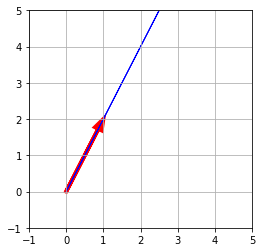

In [106]:
# Plot the vectors

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,5)          
plt.ylim(-1,5)

plt.arrow(0,0,*v1,linewidth=4, head_width=0.2, length_includes_head=True,color='r')
plt.arrow(0,0,*v2, color='b');


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = np.array([1,2])
h = np.array([4,8])

In [109]:
# these are colinear
np.multiply(g,4)

array([4, 8])

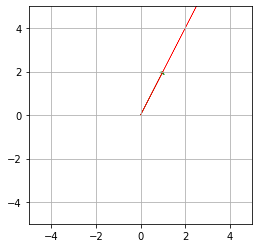

In [110]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,5)          
plt.ylim(-5,5)

plt.arrow(0,0,*g,head_width=.25, head_length=.1, linewidth=.5, length_includes_head=True, color='g')
plt.arrow(0,0,*h,head_width=.25, head_length=.1, linewidth=.5, length_includes_head=True, color='r');

In [0]:
# so the span of these vectors is the set of all scaled vectors of g

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]

In [127]:
np.linalg.matrix_rank(np.array([l,m,n]))

3

In [0]:
def to_Unit_Vector(v):
  norm_v = np.linalg.norm(v)
  return v/norm_v

In [0]:
unit_vectors = [to_Unit_Vector(v) for v in [l,m,n]]

In [117]:
for vector in unit_vectors:
  print(vector)

[0.26726124 0.53452248 0.80178373]
[-0.14142136  0.          0.98994949]
[0.43643578 0.87287156 0.21821789]


In [0]:
# these vectors are linearly independent and not scaled versions of any other so the span is the R3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



v1 dot v2: 0


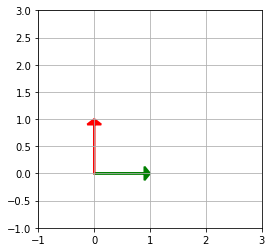

In [123]:
#Orthogonal Basis
v1 = [1,0]
v2 = [0,1]
print("v1 dot v2:",np.dot(v1,v2))

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,3)          
plt.ylim(-1,3)

plt.arrow(0,0,*v1,head_width=.25, head_length=.1, linewidth=2, length_includes_head=True, color='g')
plt.arrow(0,0,*v2,head_width=.25, head_length=.1, linewidth=2, length_includes_head=True, color='r');


## 6.2 What does it mean to form a basis?

To declare a set of vectors that are linearly independent and span the vector space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
P = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])

In [125]:
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The dimension of vector space filled by its columns

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = np.array([1,3])
w = np.array([-1,2])

#scaler of v
c = np.dot(w,v)/np.dot(v,v)

#projL(w)
proj_w = np.multiply(c,v)

# projection
r = w-proj_w

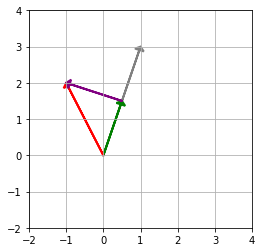

In [161]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,4)          
plt.ylim(-2,4)

plt.arrow(0,0,*v,head_width=.25, head_length=.1, linewidth=2, length_includes_head=True, color='gray')
plt.arrow(0,0,*proj_w,head_width=.25, head_length=.1, linewidth=2, length_includes_head=True, color='g')
plt.arrow(0,0,*w,head_width=.25, head_length=.1, linewidth=2, length_includes_head=True, color='r');
plt.arrow(proj_w[0],proj_w[1],*r,head_width=.25, head_length=.1, linewidth=2, length_includes_head=True, color='purple');

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

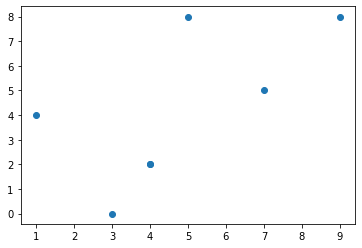

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show();